In [ ]:
#install all modules required to make the figures for the manuscript
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import seaborn as sns


### Figure 1

In [2]:
ID_DB_T = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_fingerprint.xlsx', sheet_name = 'Sheet1')
ID_T_DB = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_fingerprint.xlsx', sheet_name = 'Sheet2')
ICC_ID = pd.read_csv('/content/drive/MyDrive/manuscript_files/ICC_IDRate.csv')
ID_GSR = pd.read_csv('/content/drive/MyDrive/manuscript_files/ID_GSR.csv')

sns.set(style = 'darkgrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})


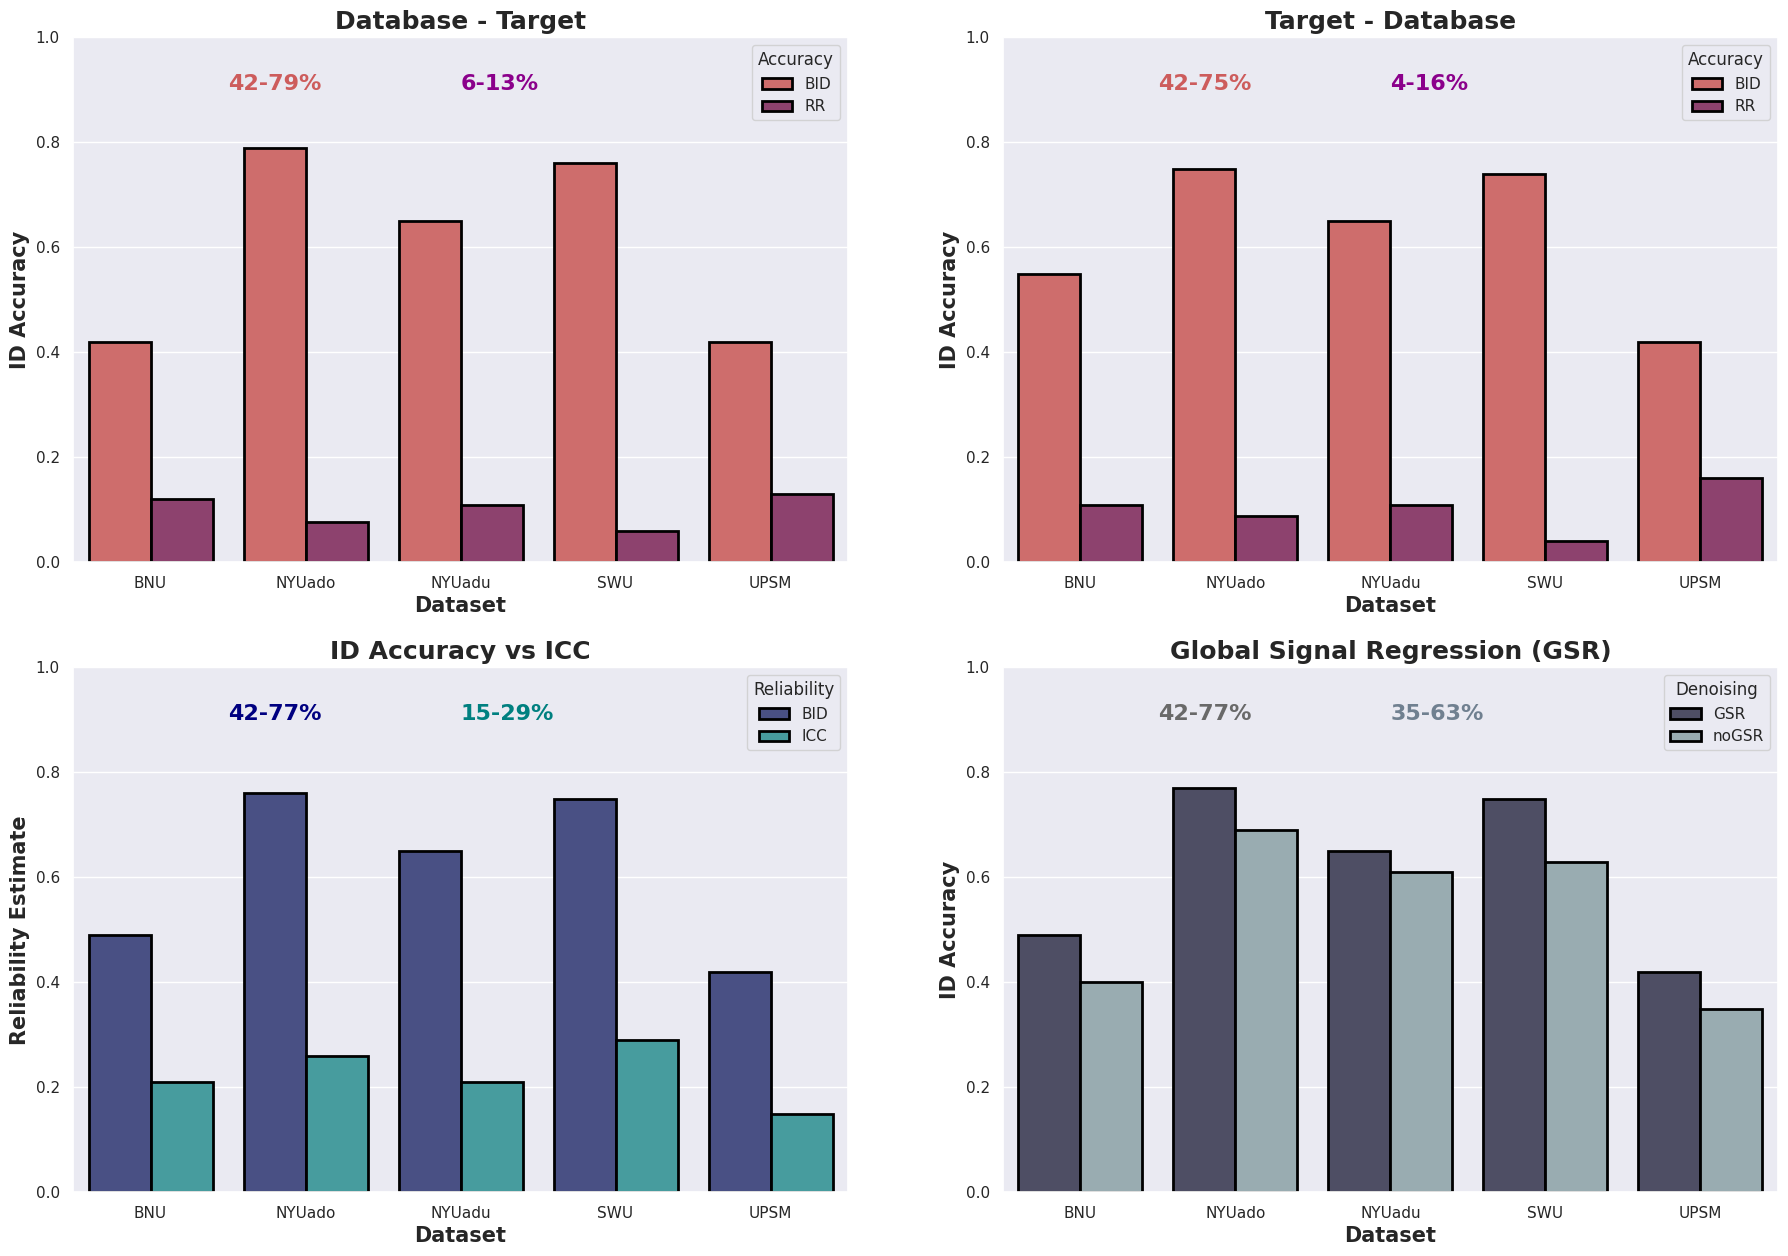

In [ ]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (22,15))
ax1 = sns.barplot(ax = axs[0,0], x = "Dataset", y = "IDRate", hue = "Accuracy", data = ID_DB_T, palette = 'flare', edgecolor = 'black',linewidth = 2, order=['BNU', 'NYUado', 'NYUadu', 'SWU', 'UPSM'])
ax2 = sns.barplot(ax = axs[0,1], x = "Dataset", y = "IDRate", hue = "Accuracy", data = ID_T_DB, palette = 'flare', edgecolor = 'black',linewidth = 2, order=['BNU', 'NYUado', 'NYUadu', 'SWU', 'UPSM'])
ax3 = sns.barplot(ax = axs[1,0], x = "Dataset", y = "Estimate", hue = "Reliability", data = ICC_ID, palette = 'mako', edgecolor = 'black',linewidth = 2)
ax4 = sns.barplot(ax = axs[1,1], x = "Dataset", y = "IDRate", hue = "Denoising", data = ID_GSR, palette = 'bone', edgecolor = 'black',linewidth = 2, order=['BNU', 'NYUado', 'NYUadu', 'SWU', 'UPSM'])

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)

ax1.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax2.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax3.set_ylabel('Reliability Estimate', fontsize = 15, fontweight = 'bold')
ax4.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')

ax1.set_xlabel('Dataset', fontsize = 15, fontweight='bold')
ax2.set_xlabel('Dataset', fontsize = 15, fontweight='bold')
ax3.set_xlabel('Dataset', fontsize = 15, fontweight='bold')
ax4.set_xlabel('Dataset', fontsize = 15, fontweight='bold')

ax1.set_title("Database - Target", fontsize = 18, fontweight='bold')
ax2.set_title("Target - Database", fontsize = 18, fontweight='bold')
ax3.set_title("ID Accuracy vs ICC", fontsize = 18, fontweight='bold')
ax4.set_title("Global Signal Regression (GSR)", fontsize = 18, fontweight='bold')

font_BID = {'family': 'serif', 'color':  'indianred', 'weight': 'bold', 'size': 16}
font_RR = {'family': 'serif', 'color':  'darkmagenta', 'weight': 'bold', 'size': 16}
font_ID = {'family': 'serif', 'color':  'navy', 'weight': 'bold', 'size': 16}
font_ICC = {'family': 'serif', 'color':  'teal', 'weight': 'bold', 'size': 16}
font_GSR = {'family': 'serif', 'color':  'dimgray', 'weight': 'bold', 'size': 16}
font_noGSR = {'family': 'serif', 'color':  'slategray', 'weight': 'bold', 'size': 16}

ax1.text(0.5, 0.9, '42-79%', fontdict = font_BID)
ax1.text(2, 0.9, '6-13%', fontdict = font_RR)
ax2.text(0.5, 0.9, '42-75%', fontdict = font_BID)
ax2.text(2, 0.9, '4-16%', fontdict = font_RR)
ax3.text(0.5, 0.9, '42-77%', fontdict = font_ID)
ax3.text(2, 0.9, '15-29%', fontdict = font_ICC)
ax4.text(0.5, 0.9, '42-77%', fontdict = font_GSR)
ax4.text(2, 0.9, '35-63%', fontdict = font_noGSR)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

#plt.savefig('/content/drive/MyDrive/manuscript_files/fig1_accuracy.png')


In [ ]:
!pip install pingouin

In [ ]:
from scipy import stats

t_test_ICC_ID = pd.read_excel('/content/drive/MyDrive/manuscript_files/t_test.xlsx', sheet_name = 'ICC_ID')
t_test_GSR = pd.read_excel('/content/drive/MyDrive/manuscript_files/t_test.xlsx', sheet_name = 'GSR')
t_test_Networks = pd.read_excel('/content/drive/MyDrive/manuscript_files/t_test.xlsx', sheet_name = 'Networks')
t_test_ID_pipeline1 = pd.read_excel('/content/drive/MyDrive/manuscript_files/t_test.xlsx', sheet_name = 'ID_pipeline1')
t_test_ID_pipeline2 = pd.read_excel('/content/drive/MyDrive/manuscript_files/t_test.xlsx', sheet_name = 'ID_pipeline2')
t_test_ICC_pipeline1 = pd.read_excel('/content/drive/MyDrive/manuscript_files/t_test.xlsx', sheet_name = 'icc_pipeline1')
t_test_ICC_pipeline2 = pd.read_excel('/content/drive/MyDrive/manuscript_files/t_test.xlsx', sheet_name = 'icc_pipeline2')

stats.ttest_rel(t_test_ICC_ID['BID'], t_test_ICC_ID['ICC'])
stats.ttest_rel(t_test_GSR['GSR'], t_test_GSR['NoGSR'])

import pingouin as pg

t_test_Networks['diff']= t_test_Networks['FP']-t_test_Networks['Whole_Brain']
t_test_GSR['diff'] = t_test_GSR['GSR'] - t_test_GSR['NoGSR']
t_test_ICC_ID['diff'] = t_test_ICC_ID['BID'] - t_test_ICC_ID['ICC']
t_test_ID_pipeline1['diff'] = t_test_ID_pipeline1['Standard'] - t_test_ID_pipeline1['Pipeline1']
t_test_ID_pipeline2['diff'] = t_test_ID_pipeline2['Standard'] - t_test_ID_pipeline2['Pipeline2']
t_test_ICC_pipeline1['diff'] = t_test_ICC_pipeline1['Standard'] - t_test_ICC_pipeline1['Pipeline1']
t_test_ICC_pipeline2['diff'] = t_test_ICC_pipeline2['Standard'] - t_test_ICC_pipeline2['Pipeline2']

stats.ttest_rel(t_test_Networks['FP'], t_test_Networks['Whole_Brain'], alternative = 'greater')


Ttest_relResult(statistic=2.7616994997617184, pvalue=0.025380523142871862)

In [ ]:
pg.ttest(x = t_test_ID_pipeline2['Pipeline2'], y = t_test_ICC_pipeline2['Standard'], paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.625,4,two-sided,0.002693,"[0.06, 0.15]",1.543708,18.259,0.733844


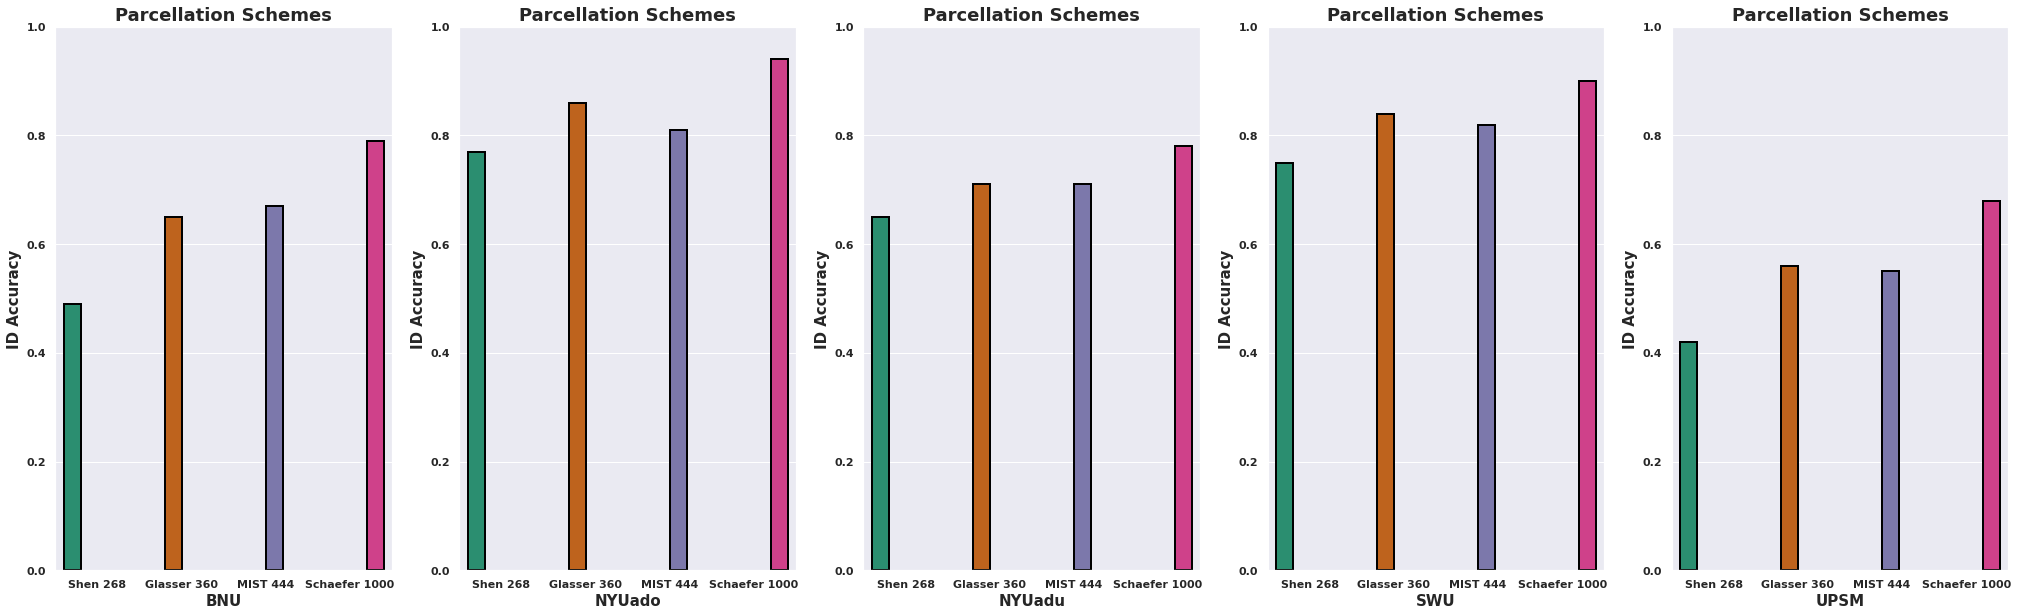

In [ ]:
ID_BNU_Parcellation = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Parcellation.xlsx', sheet_name = 'BNU')
ID_NYUado_Parcellation = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Parcellation.xlsx', sheet_name = 'NYUado')
ID_NYUadu_Parcellation = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Parcellation.xlsx', sheet_name = 'NYUadu')
ID_SWU_Parcellation = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Parcellation.xlsx', sheet_name = 'SWU')
ID_UPSM_Parcellation = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Parcellation.xlsx', sheet_name = 'UPSM')

sns.set(style = 'darkgrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

fig, axs = plt.subplots(ncols = 5, figsize = (35,10))
ax1 = sns.barplot(ax = axs[0], x = "Parcellation", y = "IDRate", hue = "Parcellation", data = ID_BNU_Parcellation, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Shen 268', 'Glasser 360', 'MIST 444', 'Schaefer 1000'])
ax2 = sns.barplot(ax = axs[1], x = "Parcellation", y = "IDRate", hue = "Parcellation", data = ID_NYUado_Parcellation, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Shen 268', 'Glasser 360', 'MIST 444', 'Schaefer 1000'])
ax3 = sns.barplot(ax = axs[2], x = "Parcellation", y = "IDRate", hue = "Parcellation", data = ID_NYUadu_Parcellation, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Shen 268', 'Glasser 360', 'MIST 444', 'Schaefer 1000'])
ax4 = sns.barplot(ax = axs[3], x = "Parcellation", y = "IDRate", hue = "Parcellation", data = ID_SWU_Parcellation, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Shen 268', 'Glasser 360', 'MIST 444', 'Schaefer 1000'])
ax5 = sns.barplot(ax = axs[4], x = "Parcellation", y = "IDRate", hue = "Parcellation", data = ID_UPSM_Parcellation, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Shen 268', 'Glasser 360', 'MIST 444', 'Schaefer 1000'])

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
ax5.set_ylim(0,1)

ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()
ax5.legend_.remove()

ax1.set_xlabel('BNU', fontsize = 15, fontweight='bold')
ax2.set_xlabel('NYUado', fontsize = 15, fontweight='bold')
ax3.set_xlabel('NYUadu', fontsize = 15, fontweight='bold')
ax4.set_xlabel('SWU', fontsize = 15, fontweight='bold')
ax5.set_xlabel('UPSM', fontsize = 15, fontweight='bold')

ax1.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax2.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax3.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax4.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax5.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')

ax1.set_title("Parcellation Schemes", fontsize = 18, fontweight='bold')
ax2.set_title("Parcellation Schemes", fontsize = 18, fontweight='bold')
ax3.set_title("Parcellation Schemes", fontsize = 18, fontweight='bold')
ax4.set_title("Parcellation Schemes", fontsize = 18, fontweight='bold')
ax5.set_title("Parcellation Schemes", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15


#plt.savefig('/content/drive/MyDrive/manuscript_files/parcellations.png')


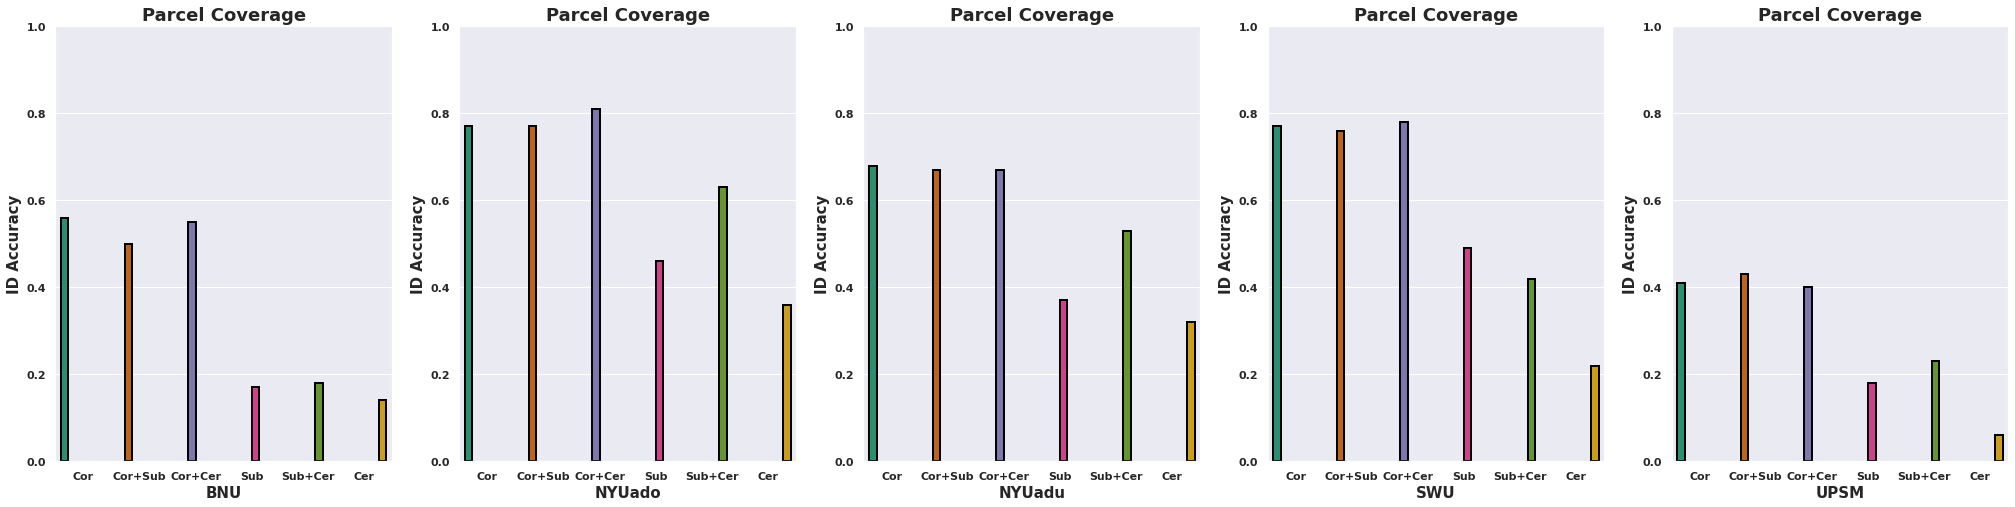

In [ ]:
ID_BNU_Coverage = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Coverage.xlsx', sheet_name = 'BNU')
ID_NYUado_Coverage = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Coverage.xlsx', sheet_name = 'NYUado')
ID_NYUadu_Coverage = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Coverage.xlsx', sheet_name = 'NYUadu')
ID_SWU_Coverage = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Coverage.xlsx', sheet_name = 'SWU')
ID_UPSM_Coverage = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Coverage.xlsx', sheet_name = 'UPSM')

sns.set(style = 'darkgrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

fig, axs = plt.subplots(ncols = 5, figsize = (35, 8))
ax1 = sns.barplot(ax = axs[0], x = "Coverage", y = "IDRate", hue = "Coverage", data = ID_BNU_Coverage, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Cor', 'Cor+Sub', 'Cor+Cer', 'Sub', 'Sub+Cer', 'Cer'])
ax2 = sns.barplot(ax = axs[1], x = "Coverage", y = "IDRate", hue = "Coverage", data = ID_NYUado_Coverage, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Cor', 'Cor+Sub', 'Cor+Cer', 'Sub', 'Sub+Cer', 'Cer'])
ax3 = sns.barplot(ax = axs[2], x = "Coverage", y = "IDRate", hue = "Coverage", data = ID_NYUadu_Coverage, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Cor', 'Cor+Sub', 'Cor+Cer', 'Sub', 'Sub+Cer', 'Cer'])
ax4 = sns.barplot(ax = axs[3], x = "Coverage", y = "IDRate", hue = "Coverage", data = ID_SWU_Coverage, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Cor', 'Cor+Sub', 'Cor+Cer', 'Sub', 'Sub+Cer', 'Cer'])
ax5 = sns.barplot(ax = axs[4], x = "Coverage", y = "IDRate", hue = "Coverage", data = ID_UPSM_Coverage, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order = ['Cor', 'Cor+Sub', 'Cor+Cer', 'Sub', 'Sub+Cer', 'Cer'])

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
ax5.set_ylim(0,1)

ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()
ax5.legend_.remove()

ax1.set_xlabel('BNU', fontsize = 15, fontweight='bold')
ax2.set_xlabel('NYUado', fontsize = 15, fontweight='bold')
ax3.set_xlabel('NYUadu', fontsize = 15, fontweight='bold')
ax4.set_xlabel('SWU', fontsize = 15, fontweight='bold')
ax5.set_xlabel('UPSM', fontsize = 15, fontweight='bold')

ax1.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax2.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax3.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax4.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax5.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')

ax1.set_title("Parcel Coverage", fontsize = 18, fontweight='bold')
ax2.set_title("Parcel Coverage", fontsize = 18, fontweight='bold')
ax3.set_title("Parcel Coverage", fontsize = 18, fontweight='bold')
ax4.set_title("Parcel Coverage", fontsize = 18, fontweight='bold')
ax5.set_title("Parcel Coverage", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

plt.savefig('/content/drive/MyDrive/manuscript_files/coverage.png')


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


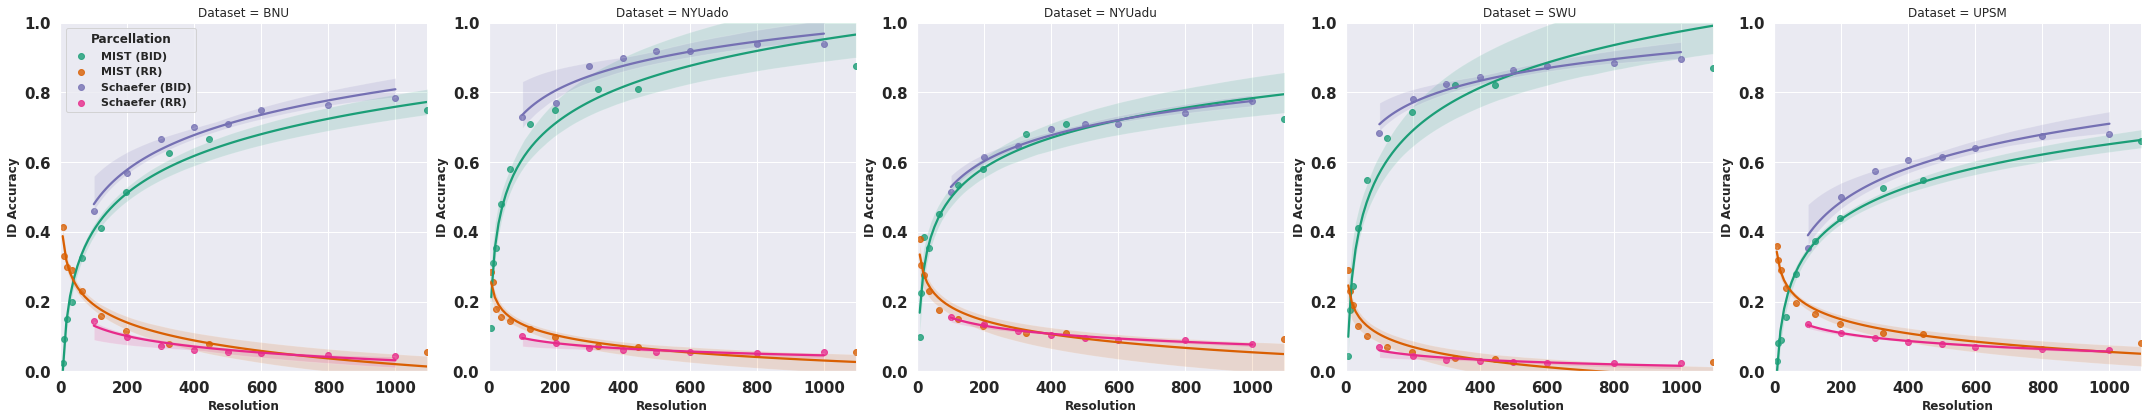

In [ ]:
ID_All_Resolution = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Resolutions.xlsx', sheet_name = 'Combined')

#plt.figure(figsize = (35, 10)
ax = sns.lmplot(x="Resolution", y="IDRateAvg", hue = "Parcellation", col = "Dataset", data = ID_All_Resolution, logx = True, palette = 'Dark2', sharey = False, height = 6, legend_out = False)
ax.set(xlabel = 'Resolution', ylabel = 'ID Accuracy')
ax.set(xlim=(0, 1095))
ax.set(ylim=(0, 1))

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

plt.savefig('/content/drive/MyDrive/manuscript_files/resolutions.png')


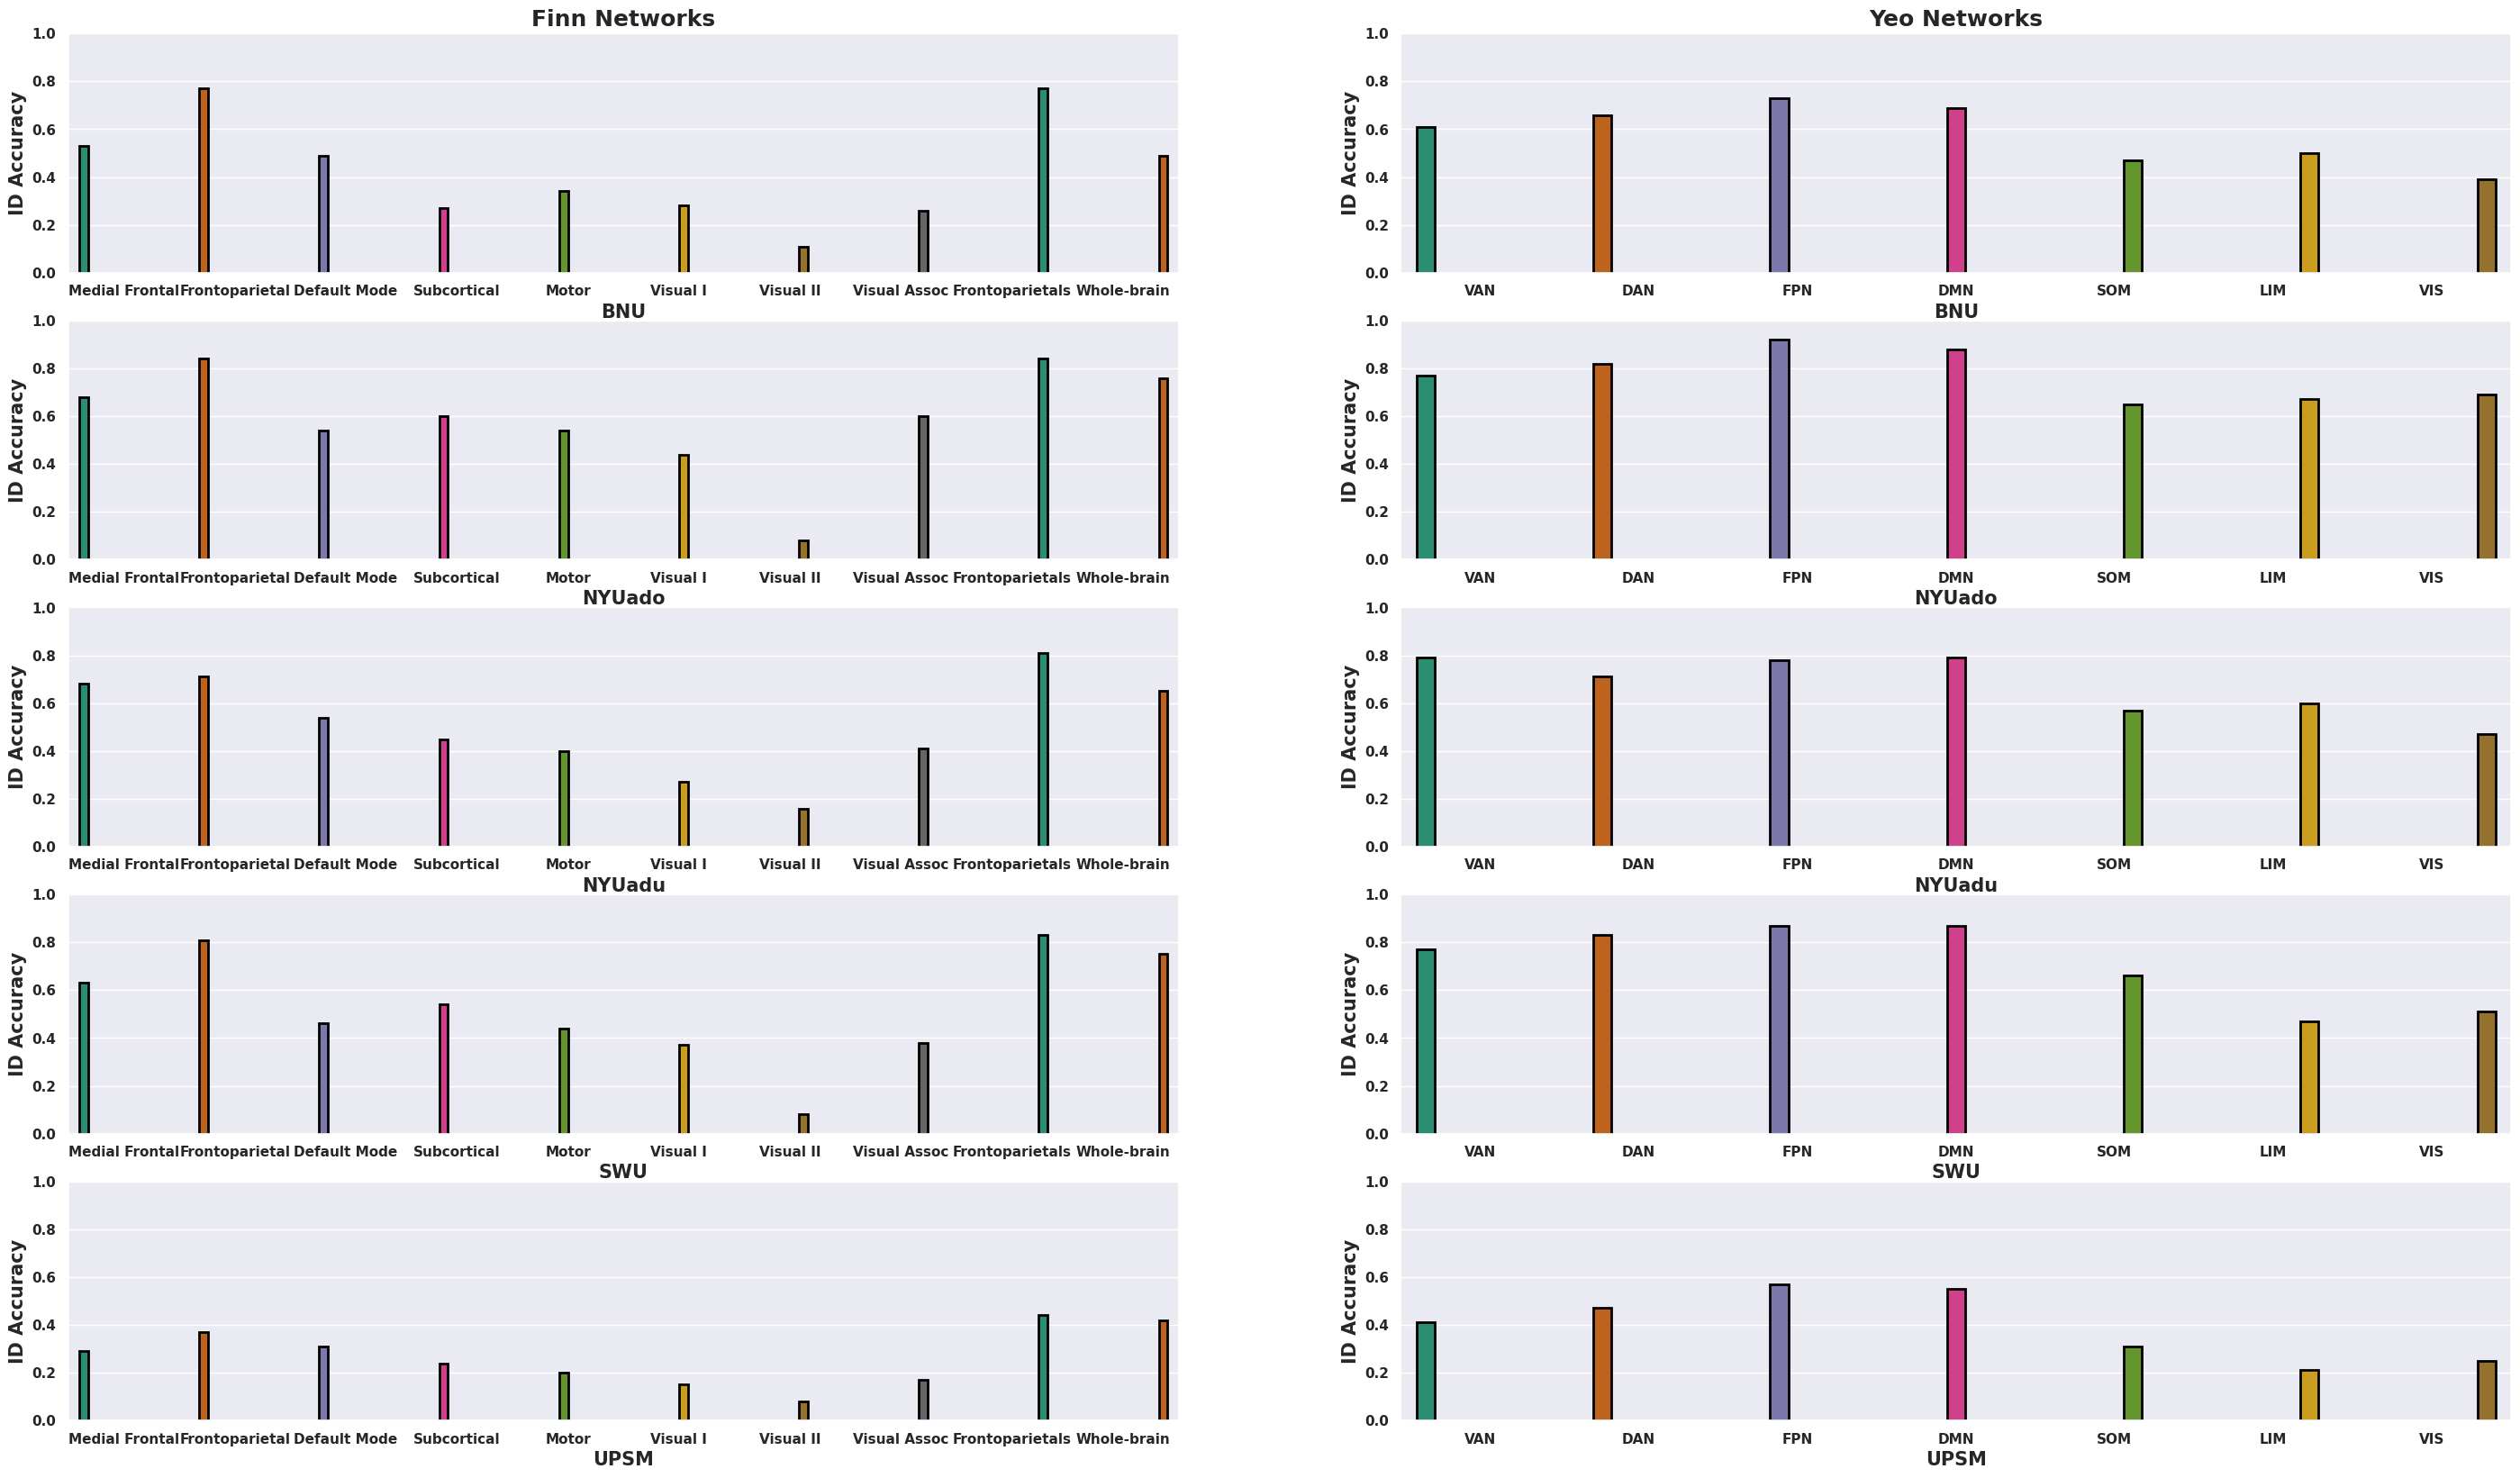

In [ ]:
ID_BNU_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'BNU')
ID_NYUado_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'NYUado')
ID_NYUadu_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'NYUadu')
ID_SWU_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'SWU')
ID_UPSM_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'UPSM')

ID_BNUY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'BNUY')
ID_NYUadoY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'NYUadoY')
ID_NYUaduY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'NYUaduY')
ID_SWUY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'SWUY')
ID_UPSMY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'UPSMY')

sns.set(style = 'darkgrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

fig, axs = plt.subplots(ncols = 2, nrows = 5, figsize = (35,20))
ax1 = sns.barplot(ax = axs[0,0], x = "Network", y = "IDRate", hue = "Network", data = ID_BNU_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax2 = sns.barplot(ax = axs[1,0], x = "Network", y = "IDRate", hue = "Network", data = ID_NYUado_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax3 = sns.barplot(ax = axs[2,0], x = "Network", y = "IDRate", hue = "Network", data = ID_NYUadu_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax4 = sns.barplot(ax = axs[3,0], x = "Network", y = "IDRate", hue = "Network", data = ID_SWU_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax5 = sns.barplot(ax = axs[4,0], x = "Network", y = "IDRate", hue = "Network", data = ID_UPSM_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)

ax6 = sns.barplot(ax = axs[0,1], x = "Network", y = "IDRate", hue = "Network", data = ID_BNUY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax7 = sns.barplot(ax = axs[1,1], x = "Network", y = "IDRate", hue = "Network", data = ID_NYUadoY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax8 = sns.barplot(ax = axs[2,1], x = "Network", y = "IDRate", hue = "Network", data = ID_NYUaduY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax9 = sns.barplot(ax = axs[3,1], x = "Network", y = "IDRate", hue = "Network", data = ID_SWUY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax10 = sns.barplot(ax = axs[4,1], x = "Network", y = "IDRate", hue = "Network", data = ID_UPSMY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)

ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()
ax5.legend_.remove()

ax6.legend_.remove()
ax7.legend_.remove()
ax8.legend_.remove()
ax9.legend_.remove()
ax10.legend_.remove()

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
ax5.set_ylim(0,1)

ax6.set_ylim(0,1)
ax7.set_ylim(0,1)
ax8.set_ylim(0,1)
ax9.set_ylim(0,1)
ax10.set_ylim(0,1)

ax1.set_xlabel('BNU', fontsize = 15, fontweight='bold')
ax2.set_xlabel('NYUado', fontsize = 15, fontweight='bold')
ax3.set_xlabel('NYUadu', fontsize = 15, fontweight='bold')
ax4.set_xlabel('SWU', fontsize = 15, fontweight='bold')
ax5.set_xlabel('UPSM', fontsize = 15, fontweight='bold')

ax6.set_xlabel('BNU', fontsize = 15, fontweight='bold')
ax7.set_xlabel('NYUado', fontsize = 15, fontweight='bold')
ax8.set_xlabel('NYUadu', fontsize = 15, fontweight='bold')
ax9.set_xlabel('SWU', fontsize = 15, fontweight='bold')
ax10.set_xlabel('UPSM', fontsize = 15, fontweight='bold')

ax1.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax2.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax3.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax4.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax5.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')

ax6.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax7.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax8.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax9.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax10.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')

ax1.set_title("Finn Networks", fontsize = 18, fontweight='bold')
ax6.set_title("Yeo Networks", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

plt.savefig('/content/drive/MyDrive/manuscript_files/networks.png')


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


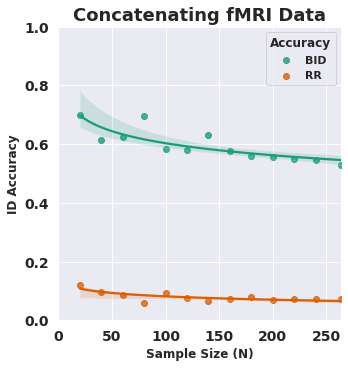

In [ ]:
ID_All_Subjects = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_subjects_BID_RR.xlsx', sheet_name = 'E100')

#plt.figure(figsize = (35, 10)
ax = sns.lmplot(x="Subjects", y="IDRate", data = ID_All_Subjects, hue = 'Accuracy', logx = True, palette = 'Dark2', ci = 95, legend_out = False)
ax.set(xlabel = 'Sample Size (N)', ylabel = 'ID Accuracy')
ax.set(xlim=(0, 264))
ax.set(ylim=(0, 1))
plt.title("Concatenating fMRI Data", fontsize = 18, fontweight = "bold")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

#plt.savefig('/content/drive/MyDrive/manuscript_files/concatenation_BID_RR.png')


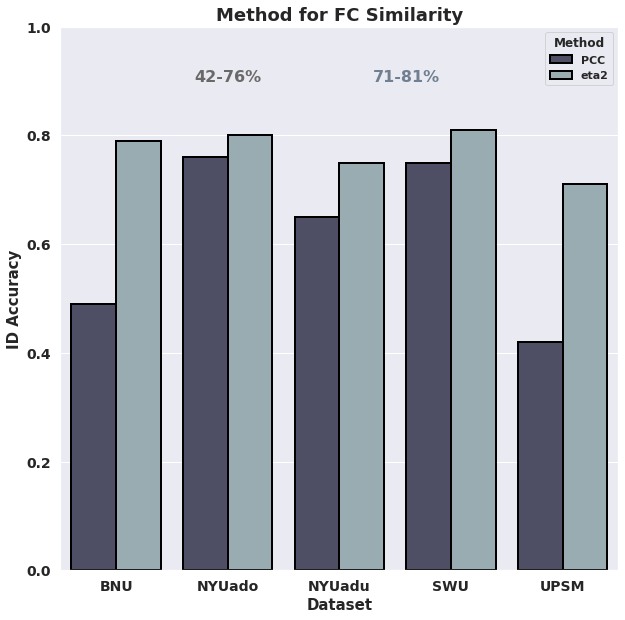

In [ ]:
ID_Similarity = pd.read_excel('/content/drive/MyDrive/manuscript_files/similarity.xlsx')

plt.figure(figsize=(10,10))
ax1 = sns.barplot(x = "Dataset", y = "IDRate", hue = "Method", data = ID_Similarity, palette = 'bone', edgecolor = 'black',linewidth = 2)

sns.set(style = 'darkgrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

ax1.set_ylim(0, 1)
ax1.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax1.set_xlabel('Dataset', fontsize = 15, fontweight = 'bold')
ax1.set_title("Method for FC Similarity", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

ax1.text(0.7, 0.9, '42-76%', fontdict = font_GSR)
ax1.text(2.3, 0.9, '71-81%', fontdict = font_noGSR)

plt.savefig('/content/drive/MyDrive/manuscript_files/similarity.png')

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


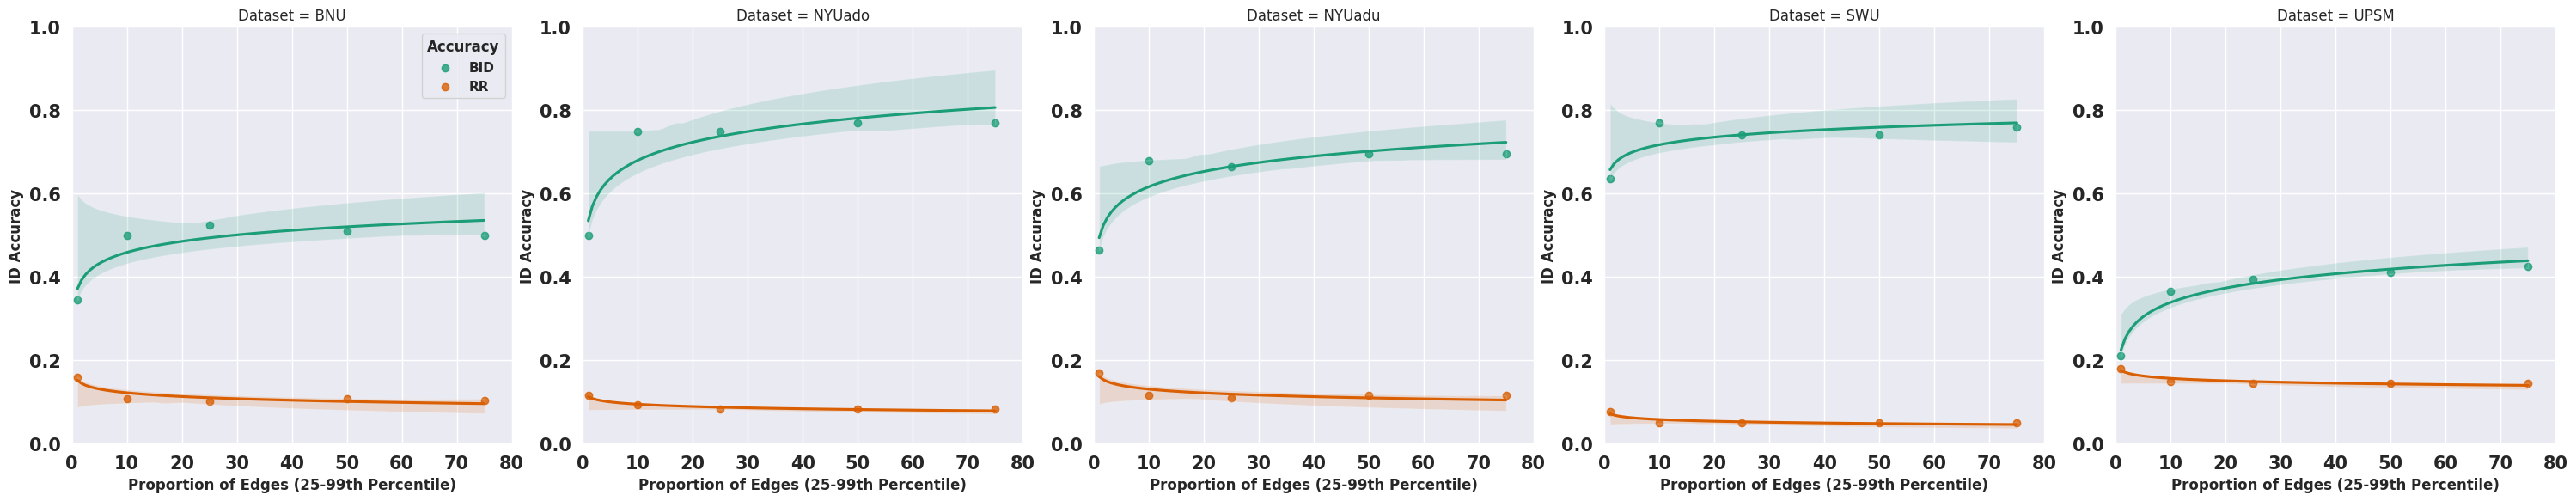

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ID_DP = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_DP.xlsx', sheet_name = 'All_2')

#plt.figure(figsize = (35, 10)
ax = sns.lmplot(x="Proprotion", y="IDRate", hue = "Accuracy", col = "Dataset", data = ID_DP, logx = True, palette = 'Dark2', sharey = False, height = 6, legend_out = False)
ax.set(xlabel = 'Proportion of Edges (25-99th Percentile)', ylabel = 'ID Accuracy')
ax.set(xlim=(0, 80))
ax.set(ylim=(0, 1))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

#plt.savefig('/content/drive/MyDrive/manuscript_files/DP_1_75.png')


(0.0, 1.0)

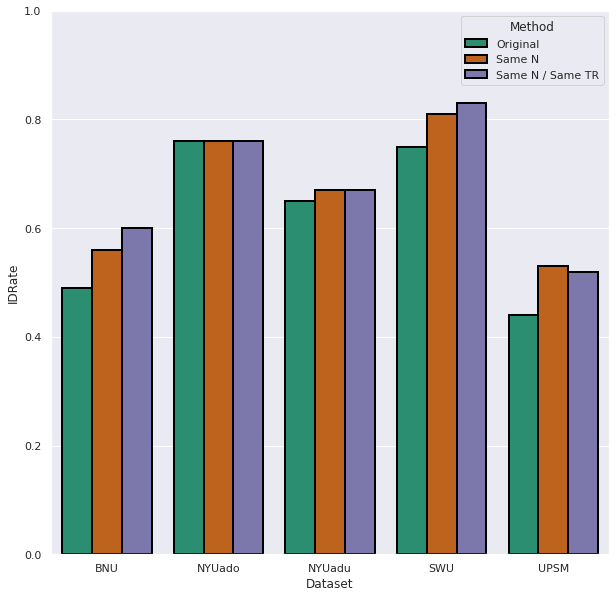

In [ ]:
ID_site = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_site.xlsx')


plt.figure(figsize=(10,10))
ax1 = sns.barplot(x = "Dataset", y = "IDRate", hue = "Method", data = ID_site, palette = 'Dark2', edgecolor = 'black',linewidth = 2, order=['BNU', 'NYUado', 'NYUadu', 'SWU', 'UPSM'])
ax1.set_ylim(0,1)


### IC Variance

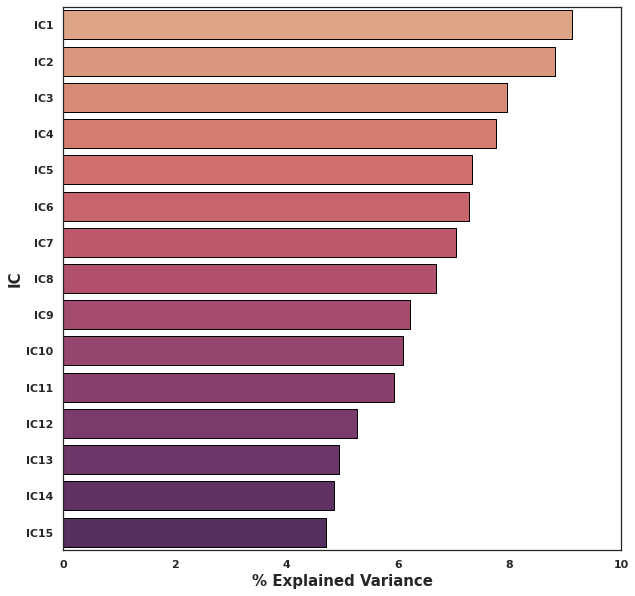

In [ ]:
plt.figure(figsize=(10, 10))

IC = pd.read_excel('/content/drive/MyDrive/Year2/IC_var_plot.xlsx')
sns.set(style = 'white')
ax = sns.barplot(x = "Variance", y="IC", data=IC, palette = 'flare', edgecolor = 'black')
ax.set_xlabel('% Explained Variance', fontsize = 15, fontweight='bold')
ax.set_ylabel('IC', fontsize = 15, fontweight='bold')

ax.set_xlim(0, 10)

import matplotlib as mpl
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rc('font', family='serif', serif = 'Times New Roman')
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 14

plt.savefig('/content/drive/MyDrive/Year2/Figure3A.png')


### Scree Plot

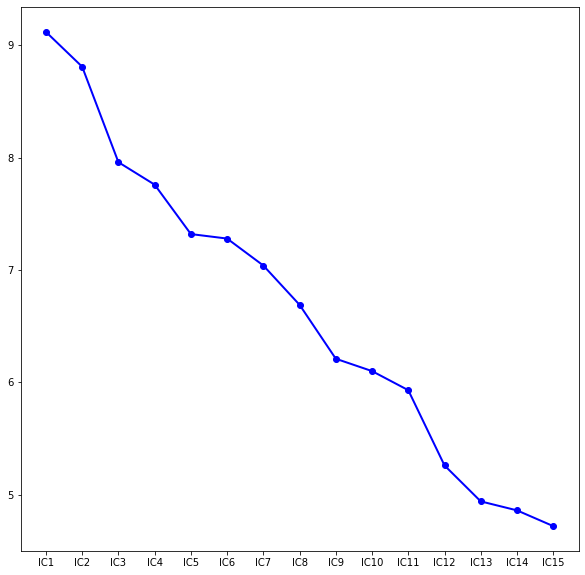

In [ ]:
plt.figure(figsize=(10, 10))
IC = pd.read_excel('/content/drive/MyDrive/Year2/IC_var_plot.xlsx')
plt.plot(IC["IC"], IC["Variance"], 'o-', linewidth = 2, color = 'blue')


In [ ]:
!pip install pingouin

In [ ]:
x1 = [0.44, 0.83, 0.81, 0.84, 0.77]
y1 = [0.42, 0.75, 0.65, 0.76, 0.49]
pg.ttest(x = x1, y = y1, paired = True, alternative = 'greater')


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.761699,4,greater,0.025381,"[0.03, inf]",0.769015,4.39,0.414284


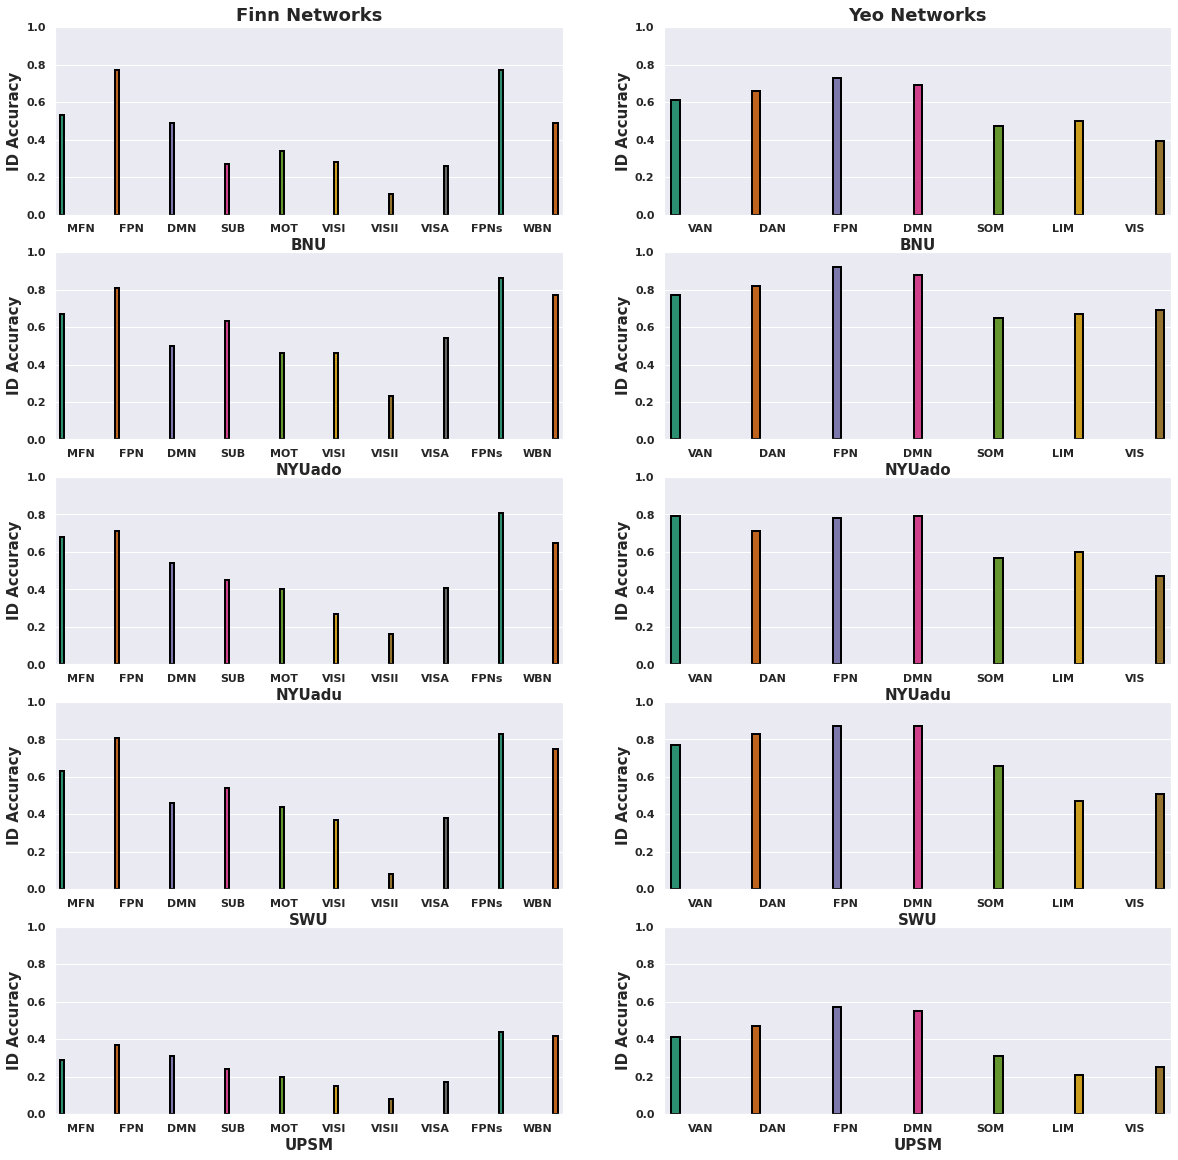

In [ ]:
ID_BNU_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'BNUF')
ID_NYUado_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'NYUadoF')
ID_NYUadu_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'NYUaduF')
ID_SWU_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'SWUF')
ID_UPSM_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'UPSMF')

ID_BNUY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'BNUY')
ID_NYUadoY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'NYUadoY')
ID_NYUaduY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'NYUaduY')
ID_SWUY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'SWUY')
ID_UPSMY_Network = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Finn_Yeo_Networks.xlsx', sheet_name = 'UPSMY')

sns.set(style = 'darkgrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

fig, axs = plt.subplots(ncols = 2, nrows = 5, figsize = (20,20))
ax1 = sns.barplot(ax = axs[0,0], x = "Network", y = "IDRate", hue = "Network", data = ID_BNU_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax2 = sns.barplot(ax = axs[1,0], x = "Network", y = "IDRate", hue = "Network", data = ID_NYUado_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax3 = sns.barplot(ax = axs[2,0], x = "Network", y = "IDRate", hue = "Network", data = ID_NYUadu_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax4 = sns.barplot(ax = axs[3,0], x = "Network", y = "IDRate", hue = "Network", data = ID_SWU_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax5 = sns.barplot(ax = axs[4,0], x = "Network", y = "IDRate", hue = "Network", data = ID_UPSM_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)

ax6 = sns.barplot(ax = axs[0,1], x = "Network", y = "IDRate", hue = "Network", data = ID_BNUY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax7 = sns.barplot(ax = axs[1,1], x = "Network", y = "IDRate", hue = "Network", data = ID_NYUadoY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax8 = sns.barplot(ax = axs[2,1], x = "Network", y = "IDRate", hue = "Network", data = ID_NYUaduY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax9 = sns.barplot(ax = axs[3,1], x = "Network", y = "IDRate", hue = "Network", data = ID_SWUY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)
ax10 = sns.barplot(ax = axs[4,1], x = "Network", y = "IDRate", hue = "Network", data = ID_UPSMY_Network, palette = 'Dark2', edgecolor = 'black',linewidth = 2)

ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
ax4.legend_.remove()
ax5.legend_.remove()

ax6.legend_.remove()
ax7.legend_.remove()
ax8.legend_.remove()
ax9.legend_.remove()
ax10.legend_.remove()

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)
ax5.set_ylim(0,1)

ax6.set_ylim(0,1)
ax7.set_ylim(0,1)
ax8.set_ylim(0,1)
ax9.set_ylim(0,1)
ax10.set_ylim(0,1)

ax1.set_xlabel('BNU', fontsize = 15, fontweight='bold')
ax2.set_xlabel('NYUado', fontsize = 15, fontweight='bold')
ax3.set_xlabel('NYUadu', fontsize = 15, fontweight='bold')
ax4.set_xlabel('SWU', fontsize = 15, fontweight='bold')
ax5.set_xlabel('UPSM', fontsize = 15, fontweight='bold')

ax6.set_xlabel('BNU', fontsize = 15, fontweight='bold')
ax7.set_xlabel('NYUado', fontsize = 15, fontweight='bold')
ax8.set_xlabel('NYUadu', fontsize = 15, fontweight='bold')
ax9.set_xlabel('SWU', fontsize = 15, fontweight='bold')
ax10.set_xlabel('UPSM', fontsize = 15, fontweight='bold')

ax1.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax2.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax3.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax4.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax5.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')

ax6.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax7.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax8.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax9.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')
ax10.set_ylabel('ID Accuracy', fontsize = 15, fontweight = 'bold')

ax1.set_title("Finn Networks", fontsize = 18, fontweight='bold')
ax6.set_title("Yeo Networks", fontsize = 18, fontweight='bold')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

plt.savefig('/content/drive/MyDrive/manuscript_files/networks_v2.png')

In [ ]:
ID_DB_T = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_fingerprint_fig1.xlsx', sheet_name = 'DB_T')
ID_T_DB = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_fingerprint_fig1.xlsx', sheet_name = 'T_DB')
ICC_ID = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_fingerprint_fig1.xlsx', sheet_name = 'ID_ICC')
ID_GSR = pd.read_csv('/content/drive/MyDrive/manuscript_files/ID_GSR.csv')

sns.set(style = 'darkgrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})


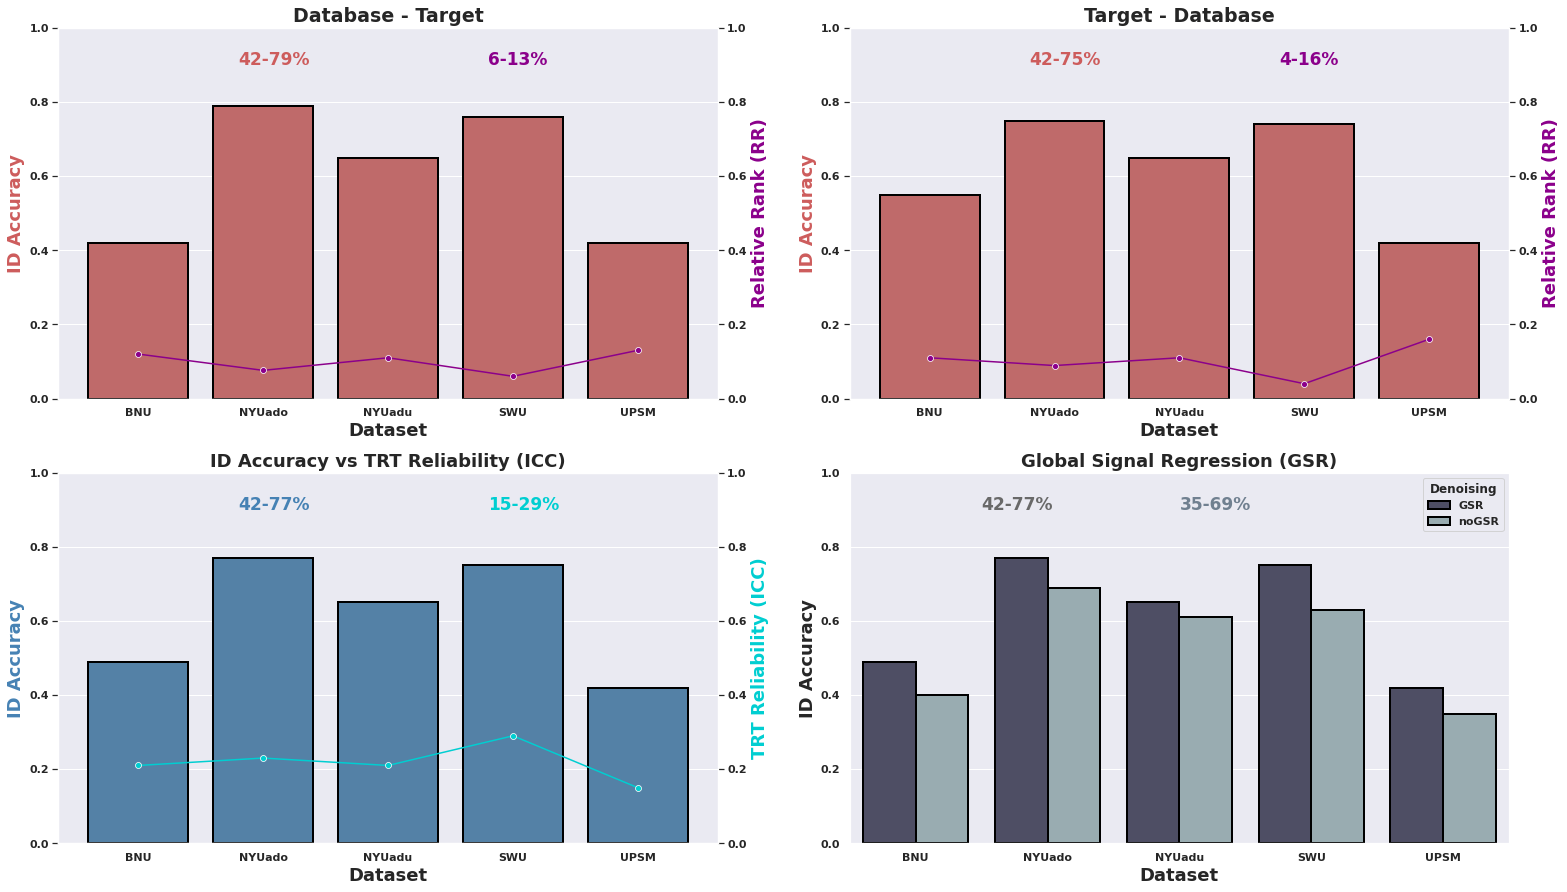

In [ ]:
sns.set(style = 'darkgrid')
import matplotlib as mpl
mpl.rc('font', family='serif', serif ='Times New Roman')
sns.set_style({'font.family': 'serif'})

fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (26,15))

ax1 = sns.barplot(ax = axs[0,0], x = "Dataset", y = "IDRate", data = ID_DB_T, color = "indianred", edgecolor = 'black',linewidth = 2, order=['BNU', 'NYUado', 'NYUadu', 'SWU', 'UPSM'])
sns.lineplot(data = [0.12, 0.076, 0.11, 0.06, 0.13], marker='o', sort = False, ax=ax1, color = "darkmagenta")
ax11 = ax1.twinx(); ax11.grid(False)

ax2 = sns.barplot(ax = axs[0,1], x = "Dataset", y = "IDRate", data = ID_T_DB, color = "indianred", edgecolor = 'black',linewidth = 2, order=['BNU', 'NYUado', 'NYUadu', 'SWU', 'UPSM'])
sns.lineplot(data = [0.11, 0.089, 0.11, 0.04, 0.16], marker='o', sort = False, ax=ax2, color = "darkmagenta")
ax22 = ax2.twinx(); ax22.grid(False)

ax3 = sns.barplot(ax = axs[1,0], x = "Dataset", y = "IDRate", data = ICC_ID, color = "steelblue", edgecolor = 'black',linewidth = 2)
sns.lineplot(data = [0.21, 0.23, 0.21, 0.29, 0.15], marker='o', sort = False, ax=ax3, color = "darkturquoise")
ax33 = ax3.twinx(); ax33.grid(False)

ax4 = sns.barplot(ax = axs[1,1], x = "Dataset", y = "IDRate", hue = "Denoising", data = ID_GSR, palette = 'bone', edgecolor = 'black',linewidth = 2, order=['BNU', 'NYUado', 'NYUadu', 'SWU', 'UPSM'])

ax1.set_ylim(0,1); #ax11.set_ylim(0, 0.9)
ax2.set_ylim(0,1); #ax22.set_ylim(0, 0.9)
ax3.set_ylim(0,1)
ax4.set_ylim(0,1)

ax1.set_ylabel('ID Accuracy', fontsize = 18, fontweight = 'bold', color = "indianred")
ax2.set_ylabel('ID Accuracy', fontsize = 18, fontweight = 'bold', color = "indianred")
ax3.set_ylabel('ID Accuracy', fontsize = 18, fontweight = 'bold', color = "steelblue")
ax4.set_ylabel('ID Accuracy', fontsize = 18, fontweight = 'bold')

ax11.set_ylabel('Relative Rank (RR)', fontsize = 18, fontweight = 'bold', color = "darkmagenta")
ax22.set_ylabel('Relative Rank (RR)', fontsize = 18, fontweight = 'bold', color = "darkmagenta")
ax33.set_ylabel('TRT Reliability (ICC)', fontsize = 18, fontweight = 'bold', color = "darkturquoise")

ax1.set_xlabel('Dataset', fontsize = 18, fontweight='bold')
ax2.set_xlabel('Dataset', fontsize = 18, fontweight='bold')
ax3.set_xlabel('Dataset', fontsize = 18, fontweight='bold')
ax4.set_xlabel('Dataset', fontsize = 18, fontweight='bold')

ax1.set_title("Database - Target", fontsize = 19, fontweight='bold')
ax2.set_title("Target - Database", fontsize = 19, fontweight='bold')
ax3.set_title("ID Accuracy vs TRT Reliability (ICC)", fontsize = 18, fontweight='bold')
ax4.set_title("Global Signal Regression (GSR)", fontsize = 18, fontweight='bold')

font_BID = {'family': 'serif', 'color':  'indianred', 'weight': 'bold', 'size': 17}
font_RR = {'family': 'serif', 'color':  'darkmagenta', 'weight': 'bold', 'size': 17}
font_ID = {'family': 'serif', 'color':  'steelblue', 'weight': 'bold', 'size': 17}
font_ICC = {'family': 'serif', 'color':  'darkturquoise', 'weight': 'bold', 'size': 17}
font_GSR = {'family': 'serif', 'color':  'dimgray', 'weight': 'bold', 'size': 17}
font_noGSR = {'family': 'serif', 'color':  'slategray', 'weight': 'bold', 'size': 17}

ax1.text(0.8, 0.9, '42-79%', fontdict = font_BID)
ax1.text(2.8, 0.9, '6-13%', fontdict = font_RR)
ax2.text(0.8, 0.9, '42-75%', fontdict = font_BID)
ax2.text(2.8, 0.9, '4-16%', fontdict = font_RR)
ax3.text(0.8, 0.9, '42-77%', fontdict = font_ID)
ax3.text(2.8, 0.9, '15-29%', fontdict = font_ICC)
ax4.text(0.5, 0.9, '42-77%', fontdict = font_GSR)
ax4.text(2, 0.9, '35-69%', fontdict = font_noGSR)

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

#plt.savefig('/content/drive/MyDrive/manuscript_files/fig1_accuracy.png')

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


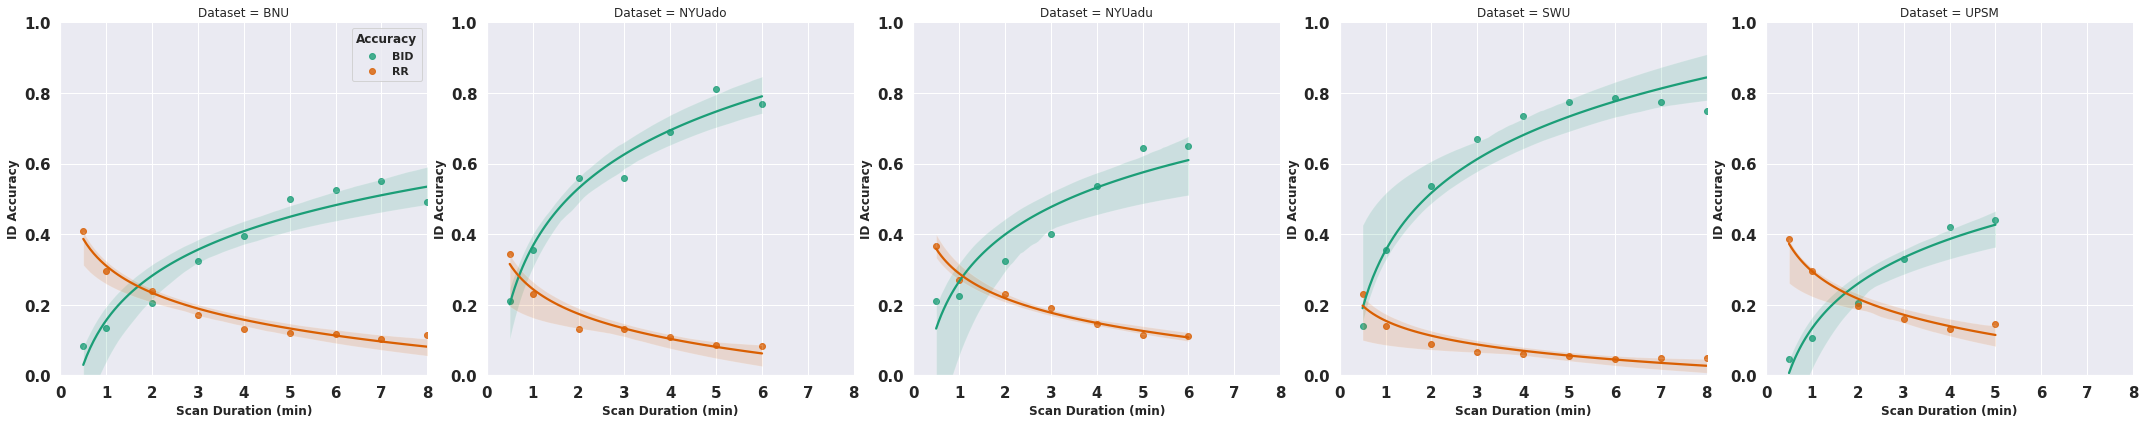

In [ ]:
ID_DP = pd.read_excel('/content/drive/MyDrive/manuscript_files/ID_Scan_Duration.xlsx', sheet_name = 'All')

#plt.figure(figsize = (35, 10)
ax = sns.lmplot(x="ScanDuration", y="IDRate", hue = "Accuracy", col = "Dataset", data = ID_DP, logx = True, palette = 'Dark2', sharey = False, height = 6, legend_out = False)
ax.set(xlabel = 'Scan Duration (min)', ylabel = 'ID Accuracy')
ax.set(xlim=(0, 8))
ax.set(ylim=(0, 1))

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

plt.savefig('/content/drive/MyDrive/manuscript_files/scan_duration.png')


In [ ]:
import pingouin as pg

ID = [0.49, 0.77, 0.65, 0.75, 0.42]
FPN = [0.77, 0.86, 0.81, 0.83, 0.44]
diff = np.array(ID) - np.array(FPN)
pg.ttest(x = FPN, y = ID, paired = True)
#pg.normality(diff)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.834504,4,two-sided,0.047129,"[0.0, 0.25]",0.767879,2.314,0.263277


In [ ]:
anovas = pd.read_excel('/content/drive/MyDrive/manuscript_files/statistics.xlsx', sheet_name = 'resolution')
from statsmodels.stats.anova import AnovaRM
print(AnovaRM(data=anovas, depvar='ID', subject='Dataset', within=['Parcellation']).fit())


                  Anova
             F Value Num DF  Den DF Pr > F
------------------------------------------
Parcellation 31.1407 3.0000 12.0000 0.0000



In [ ]:
import pingouin as pg

ID = [0.49, 0.77, 0.65, 0.75, 0.42]
Sch = [0.79,0.94,0.78,0.90,0.68]
FPN = [0.77, 0.86, 0.81, 0.83, 0.44]
pg.ttest(x = Sch, y = ID, paired = True)

sICC = [0.21,0.23,0.15,0.21,0.29]
ICCP1 = [0.25,0.28,0.19,0.29,0.35]
ICCP2 = [0.29,0.33,0.21,0.35,0.40]
pg.ttest(x = ICCP2, y = sICC, paired = True)

pg.ttest(x = Sch, y = ID, paired = True)



,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.107208,4,two-sided,0.003638,"[0.11, 0.29]",1.526976,14.668,0.725105


### ID CPM

(0.0, 1.0)

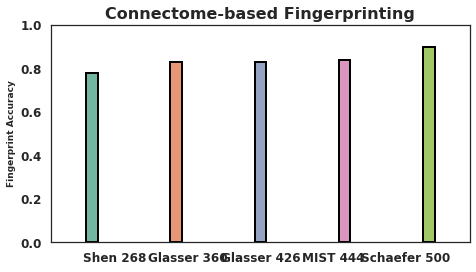

In [ ]:
HBNID = pd.read_excel('/content/drive/MyDrive/IDCPM.xlsx', sheet_name = 'ALL')

fig, ax = plt.subplots(figsize = (7.5, 4))
sns.set_style("white")
sns.barplot(x = "Parcellation", y = "IDRate", hue = "Parcellation", data = HBNID, palette = 'Set2', edgecolor = 'black',linewidth = 2)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

plt.title('Connectome-based Fingerprinting', fontsize = 16, fontweight = 'bold')
font_BID = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'size': 14}
#ax.text(0.1, 0.9, 'HBN (N = 291)', fontdict = font_BID)

plt.legend([], [], frameon = False)
plt.margins(x = 0.1)
plt.xlabel('')
plt.ylabel('Fingerprint Accuracy', fontsize = 9, fontweight = 'bold')
plt.ylim(0, 1)
#plt.savefig('/content/drive/MyDrive/manuscript_files/HBNID_Schaefer.png')
